**Universidad Nacional Abierta y a Distancia**

**Curso:** Análisis de datos

Tarea 5. Algoritmos de Aprendizaje Supervisado

**Presentado Por:** Freddy Ernesto Sánchez Jerez

**Grupo:** 202016908_76

# Tabla de contenido

1. Introduccion

    * 1.1 Ajustar ambiente de programación
    * 1.2. Carga información

2. Regresión lineal

    * 2.1 Análisis exploratorio de datos (EDA)
    * 2.2 Preprocesamiento de datos
    * 2.3 Selección de características
    * 2.4 División del Dataset en Train y Test
    * 2.5 Entrenar el Modelo de Regresión Lineal
    * 2.6 Evaluar desempeño del Modelo
    * 2.7. Visualización de resultados
    
3. Conclusiones

# 1. Introducción

En esta tarea se realizará paso a paso un modelo de aprendizaje supervisado para el Titanic Dataset, Set de datos sobre los pasajeros del Titanic. 
Permite practicar modelos de clasificación y regresión para predecir quién sobrevivió al naufragio.

## 1.1. Ajustar ambiente de programación

In [5]:
## Instalar librerias necesarias
#!pip install pandas
#!pip install matplotlib
#!pip install -U scikit-learn
#!pip install kagglehub
#!pip install seaborn

## 1.2. Carga información

In [33]:
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Fredd\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


In [34]:
os.listdir(path)

['Titanic-Dataset.csv']

## 2.1 Análisis exploratorio de datos (EDA)
El objetivo de esta fase es entender la estructura de los datos, identificar valores atípicos, relaciones entre variables, distribuciones y tendencias.

Path to dataset files: C:\Users\Fredd\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1
Files in dataset: ['Titanic-Dataset.csv']
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    ma

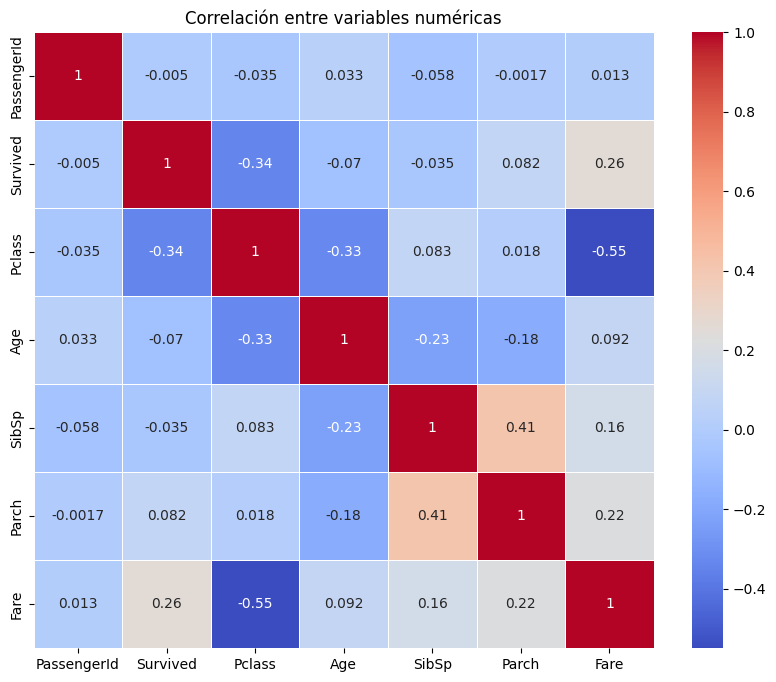

In [35]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Descargar la versión más reciente del dataset
path = kagglehub.dataset_download("yasserh/titanic-dataset")

# Confirmar el archivo descargado
print("Path to dataset files:", path)
dataset_files = os.listdir(path)
print("Files in dataset:", dataset_files)

# Ruta del archivo CSV
csv_file = os.path.join(path, 'Titanic-Dataset.csv')

# Cargar el dataset
titanic_data = pd.read_csv(csv_file)

# Ver las primeras filas del dataset
print(titanic_data.head())

# Información general sobre el dataset
print(titanic_data.info())

# Descripción estadística de los datos numéricos
print(titanic_data.describe())

# Ver la cantidad de valores faltantes por columna
print("Valores faltantes por columna:")
print(titanic_data.isnull().sum())

# Filtrar solo las columnas numéricas
numeric_data = titanic_data.select_dtypes(include=[np.number])

# Imputar valores faltantes con la media para las columnas numéricas
numeric_data = numeric_data.fillna(numeric_data.mean())

# Visualizar la correlación entre variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()  # Usar solo las columnas numéricas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre variables numéricas')
plt.show()

- Distribución de los datos: La mayoría de las variables pueden ser categóricas (por ejemplo, **Survived**, **Pclass**, **Sex**) o numéricas (por ejemplo, **Age**, **Fare**). Al visualizar la distribución de estas variables, es importante notar las proporciones de sobrevivientes y no sobrevivientes, la distribución de edades, tarifas de boletos, etc.

- Relaciones entre variables: Se pueden identificar relaciones entre la variable objetivo (**Survived**) y otras variables. Por ejemplo, se espera que las personas en clases más altas (**Pclass**) tengan una mayor probabilidad de sobrevivir. El género también puede tener una relación significativa con la supervivencia, ya que históricamente se ha mostrado que las mujeres tuvieron una mayor tasa de supervivencia en el Titanic.

- Identificación de valores atípicos: Las variables como **Fare** pueden contener valores atípicos que podrían afectar el análisis. Se deben identificar mediante diagramas de caja o análisis estadísticos.

- Tendencias: Se puede observar si hay tendencias, como la supervivencia en función de la edad, clase, o género.

# 2. Preprocesamiento de los Datos
En esta fase, nos encargaremos de limpiar los datos, tratar los valores faltantes, transformar las variables y realizar la codificación de las variables categóricas.

In [ ]:
# Rellenar valores faltantes en 'Age' con la mediana
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Rellenar valores faltantes en 'Embarked' con el valor más frecuente
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Rellenar valores faltantes en 'Fare' con la mediana
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Eliminar la columna 'Cabin' debido a la gran cantidad de valores faltantes
titanic_data.drop(columns=['Cabin'], inplace=True)

# Codificar variables categóricas: 'Sex' y 'Embarked'
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Eliminar la columna 'Name' ya que no aporta información relevante para el modelo
titanic_data.drop(columns=['Name', 'Ticket'], inplace=True)

# Verificar los datos limpios
print(titanic_data.isnull().sum())
print(titanic_data.head())

- Hemos rellenado los valores faltantes para las variables 'Age', 'Embarked' y 'Fare', utilizando la mediana para las variables numéricas y el valor más frecuente para la categórica.
- Eliminamos la columna 'Cabin' debido a que tiene demasiados valores nulos.
- Codificamos las variables categóricas (**'Sex'**, **'Embarked'** y **Pclass**) usando codificación binaria y ordinal respectivamente de manera que el modelo pueda procesarlas. Esto se puede hacer usando Label Encoding o One-Hot Encoding.
- Se eliminan las columnas irrelevantes como **'Name'** y **'Ticket'**.
- Se realiza un escalado de datos numéricos en variables como **Age** y **Fare** pueden necesitar ser escaladas para que estén en el mismo rango de valores. Esto se puede hacer utilizando técnicas como StandardScaler o MinMaxScaler.
- En la transformación de datos realizada se le podrían aplicar transformaciones a las variables numéricas si se detecta una distribución sesgada (por ejemplo, logaritmo de la tarifa de los boletos).

## 2.3 Selección de características

La selección de características nos ayuda a determinar qué variables serán utilizadas en el modelo. Para este caso, seleccionaremos las variables más relevantes en función de la correlación y la importancia de las características.

In [ ]:
# Analizar correlaciones y seleccionar variables
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

# Graficar la relación de las características con la variable objetivo
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre características y la variable objetivo')
plt.show()

# Se pueden seleccionar variables de acuerdo a las correlaciones observadas

- Se observa la correlación entre las características y la variable objetivo 'Survived'. Usualmente, variables como 'Pclass', 'Sex', 'Age', 'Fare', etc., son las más relevantes.
- Usamos pruebas de correlación para identificar variables que están fuertemente correlacionadas con la variable objetivo (Survived).
- Usamos técnicas como PCA (Análisis de Componentes Principales) para reducir las características, manteniendo las más relevantes.

## 2.4 División del Dataset en Train y Test

Dividimos los datos en dos conjuntos: entrenamiento (Train) y prueba (Test) para poder evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en Train y Test (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")

- 80% de los datos se usan para entrenar el modelo, mientras que el 20% restante se utiliza para evaluar el desempeño del modelo. Esto asegura que el modelo sea entrenado en una porción del conjunto de datos y evaluado en una porción diferente, lo que permite obtener una estimación imparcial del rendimiento del modelo.
- Para obtener una evaluación más robusta, aplicamos la validación cruzada para asegurar que el modelo generalice bien a datos no vistos.

## 2.5 Entrenar el Modelo de Regresión Lineal

Entrenamos el modelo utilizando Regresión Logística ya que la variable objetivo ('Survived') es binaria (0 o 1).

In [30]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

- Se usa Regresión Logística para predecir la probabilidad de supervivencia (una tarea de clasificación binaria).
- Entrenamos el modelo con los datos de entrenamiento y realizamos predicciones sobre los datos de prueba.

## 2.6 Evaluar desempeño del Modelo
Evaluamos el desempeño del modelo utilizando métricas de clasificación como precisión, recall, F1-score y la matriz de confusión.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precisión: {accuracy}")
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Matriz de confusión:")
print(conf_matrix)

- Una vez que el modelo ha sido entrenado, se evalúa utilizando el conjunto de datos de prueba.
- Precisión: Mide la proporción de predicciones correctas en relación al total de predicciones.
- Recall: Mide la capacidad del modelo para identificar todos los casos positivos.
- F1 Score: Es la media armónica entre precisión y recall.
- Matriz de confusión: Muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
- Con base en estos resultados, podemos tomar la decisión que el modelo es adecuado para ser utilizado en producción.

## 2.7. Visualización de resultados
Finalmente, visualizamos los resultados utilizando gráficas.

In [ ]:
# Gráfica de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Gráfica de precisión, recall y F1 Score
metrics = [accuracy, precision, recall, f1]
metrics_names = ['Precisión', 'Precisión', 'Recall', 'F1 Score']

plt.bar(metrics_names, metrics, color='skyblue')
plt.title('Evaluación del Modelo')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.show()

- La matriz de confusión muestra cómo se clasificaron correctamente los datos y cuáles fueron los errores.
- El gráfico de precisión, recall y F1-score proporciona una visión general del rendimiento del modelo.

# 5. Conclusiones
- Se entrenó un modelo de Regresión Logística para predecir la supervivencia en el Titanic.
- El análisis exploratorio de los datos reveló relaciones importantes y posibles problemas con valores faltantes, que fueron corregidos.
- La evaluación mostró el desempeño del modelo, con precisión y recall como métricas clave.
- A través de la visualización, se comprendió mejor el comportamiento del modelo.